# **FEATURE ENGINEERING NOTEBOOK**

<br>

## Objectives

* Engineer features for Regression and Cluster models

## Inputs

* outputs/datasets/cleaned/TrainSetCleaned.csv
* outputs/datasets/cleaned/TestSetCleaned.csv

## Outputs

* generate a list with variables to 

## Conclusions

* Feature Engineering Transformers:
  * LIST THEM HERE

---

# Change working directory to the parent folder

Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-heritage-housing-issues'

# Load the Cleaned Data

* Train Set

In [4]:
import pandas as pd
TrainSet = pd.read_csv("outputs/datasets/cleaned/TrainSetCleaned.csv")
TrainSet.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,3.0,Av,48,Missing,1774,774,Unf,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.0,No,0,Unf,894,308,Missing,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.0,No,713,ALQ,163,432,Unf,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500
3,1689,0.0,3.0,No,1218,GLQ,350,857,RFn,2002.0,...,13265,69.0,148.0,59,5,8,1568,2002,2002,271000
4,1541,0.0,3.0,No,0,Unf,1541,843,RFn,2001.0,...,13704,118.0,150.0,81,5,7,1541,2001,2002,205000


* Test Set

In [5]:
TestSet = pd.read_csv("outputs/datasets/cleaned/TestSetCleaned.csv")
TestSet.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,2515,0.0,4.0,No,1219,Rec,816,484,Missing,1975.0,...,32668,69.0,0.0,0,3,6,2035,1957,1975,200624
1,958,620.0,3.0,No,403,BLQ,238,240,Unf,1941.0,...,9490,79.0,0.0,0,7,6,806,1941,1950,133000
2,979,224.0,3.0,No,185,LwQ,524,352,Unf,1950.0,...,7015,69.0,161.0,0,4,5,709,1950,1950,110000
3,1156,866.0,4.0,No,392,BLQ,768,505,Fin,1977.0,...,10005,83.0,299.0,117,5,7,1160,1977,1977,192000
4,525,0.0,3.0,No,0,Unf,525,264,Unf,1971.0,...,1680,21.0,381.0,0,5,6,525,1971,1971,88000


* Work with a copy of the datasets

In [6]:
TrainSet_cleaned = TrainSet.copy()
TrainSet_cleaned.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,1828,0.0,3.0,Av,48,Missing,1774,774,Unf,2007.0,...,11694,90.0,452.0,108,5,9,1822,2007,2007,314813
1,894,0.0,2.0,No,0,Unf,894,308,Missing,1962.0,...,6600,60.0,0.0,0,5,5,894,1962,1962,109500
2,964,0.0,2.0,No,713,ALQ,163,432,Unf,1921.0,...,13360,80.0,0.0,0,7,5,876,1921,2006,163500
3,1689,0.0,3.0,No,1218,GLQ,350,857,RFn,2002.0,...,13265,69.0,148.0,59,5,8,1568,2002,2002,271000
4,1541,0.0,3.0,No,0,Unf,1541,843,RFn,2001.0,...,13704,118.0,150.0,81,5,7,1541,2001,2002,205000


In [7]:
TestSet_cleaned = TestSet.copy()
TestSet_cleaned.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,2515,0.0,4.0,No,1219,Rec,816,484,Missing,1975.0,...,32668,69.0,0.0,0,3,6,2035,1957,1975,200624
1,958,620.0,3.0,No,403,BLQ,238,240,Unf,1941.0,...,9490,79.0,0.0,0,7,6,806,1941,1950,133000
2,979,224.0,3.0,No,185,LwQ,524,352,Unf,1950.0,...,7015,69.0,161.0,0,4,5,709,1950,1950,110000
3,1156,866.0,4.0,No,392,BLQ,768,505,Fin,1977.0,...,10005,83.0,299.0,117,5,7,1160,1977,1977,192000
4,525,0.0,3.0,No,0,Unf,525,264,Unf,1971.0,...,1680,21.0,381.0,0,5,6,525,1971,1971,88000


# Data Exploration

* In notebooks 1 and 2, 3 EDA was also carried out. However, the EDA here aims to evaluate the potential transformation to apply to the variables

In [8]:
from ydata_profiling import ProfileReport
profile_report= ProfileReport(df=TrainSet_cleaned, minimal=True)
#profile_report.to_notebook_iframe()

#### Check Outliers

* Step 1: List the numerical variables of the cleaned Train set

In [14]:
numerical_vars = TrainSet_cleaned.select_dtypes(include="number").columns.to_list()
numerical_vars

['1stFlrSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'LotArea',
 'LotFrontage',
 'MasVnrArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']

* Step 2: Load the custom function plot_histogram_and_boxplot(df) provided by Code Institute to asses the variables distribution and visualize outliers

In [15]:
def plot_histogram_and_boxplot(df):
  for col in df.columns:
    fig, axes = plt.subplots(nrows=2 ,ncols=1 ,figsize=(7,7), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()

    IQR = df[col].quantile(q=0.75) - df[col].quantile(q=0.25)
    print(
        f"This is the range where a datapoint is not an outlier: from "
        f"{(df[col].quantile(q=0.25) - 1.5*IQR).round(2)} to "
        f"{(df[col].quantile(q=0.75) + 1.5*IQR).round(2)}")
    print("\n")

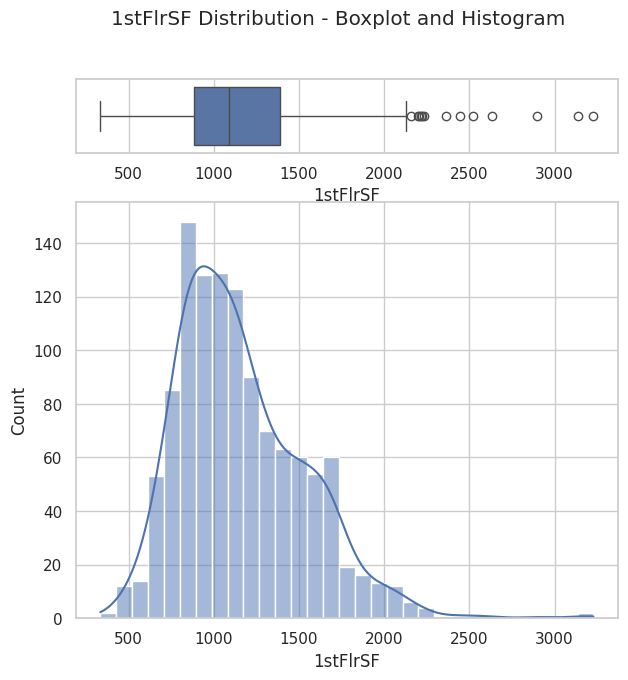

This is the range where a datapoint is not an outlier: from 126.12 to 2147.12




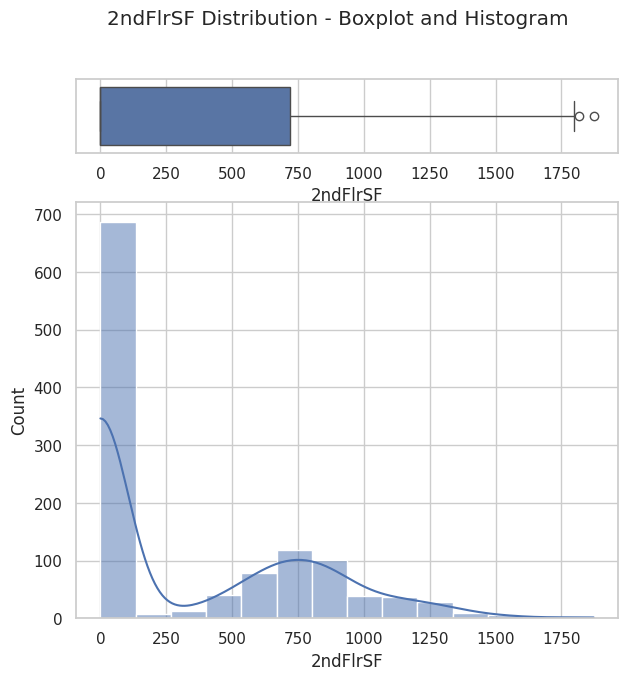

This is the range where a datapoint is not an outlier: from -1080.0 to 1800.0




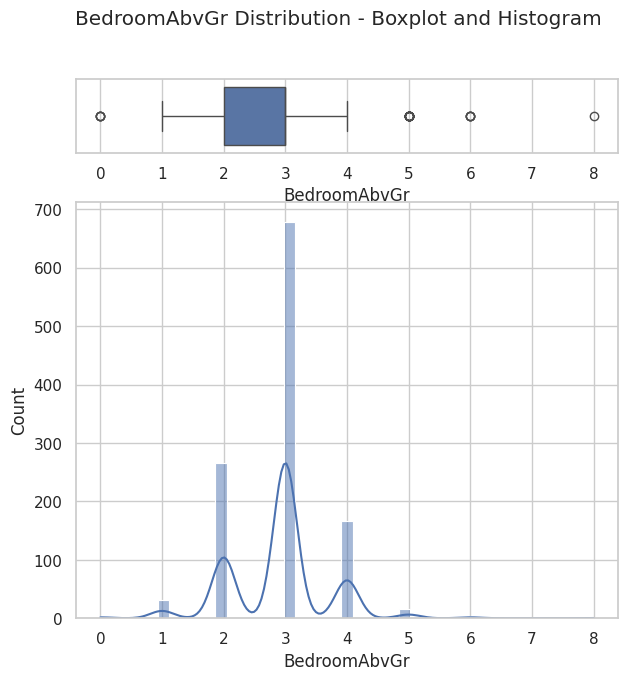

This is the range where a datapoint is not an outlier: from 0.5 to 4.5




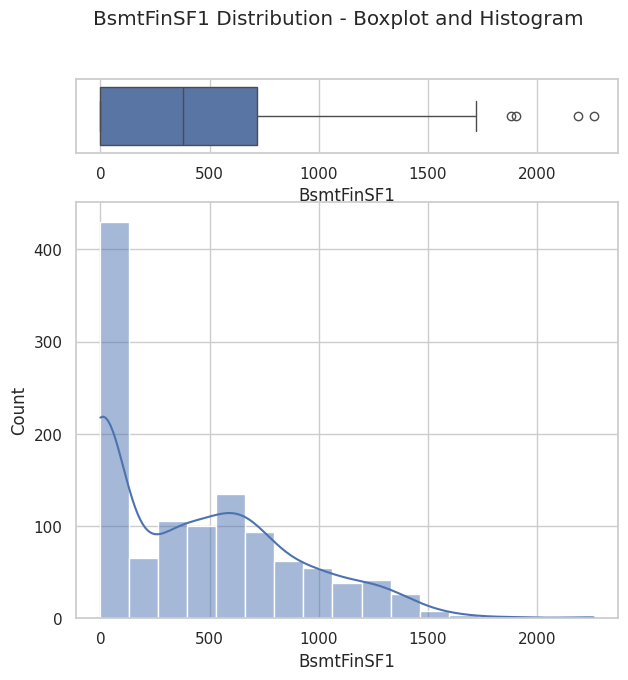

This is the range where a datapoint is not an outlier: from -1074.0 to 1790.0




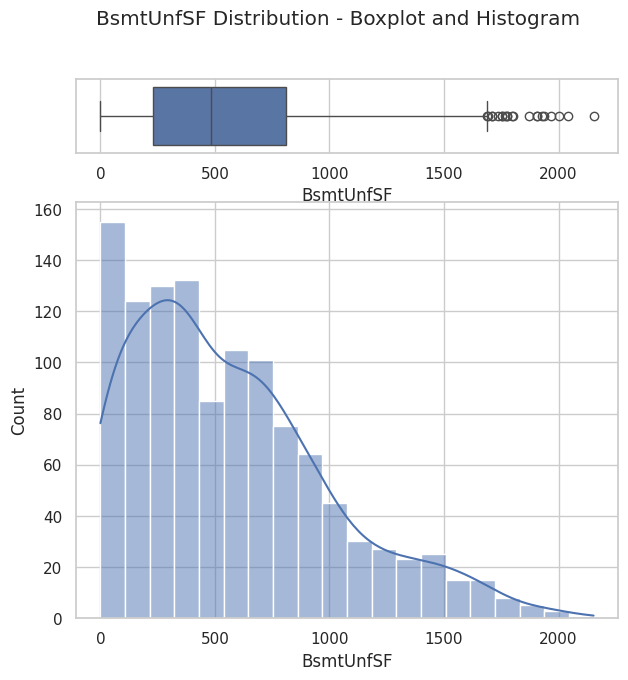

This is the range where a datapoint is not an outlier: from -646.88 to 1686.12




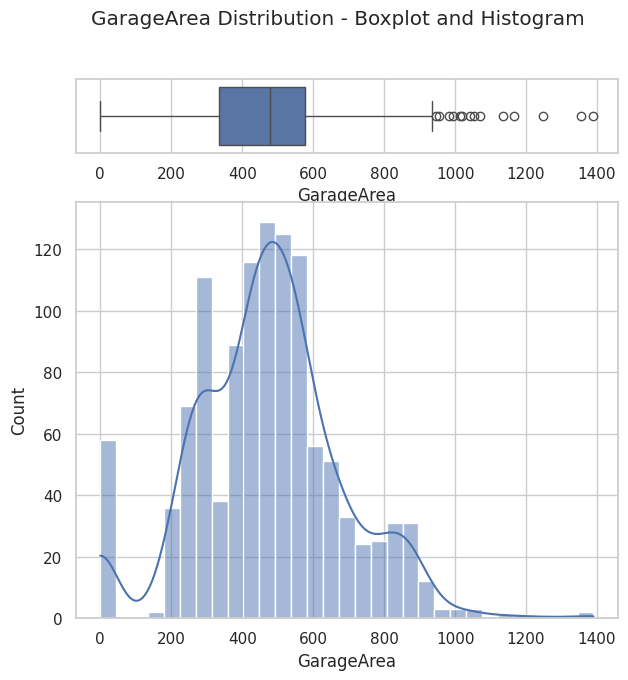

This is the range where a datapoint is not an outlier: from -24.0 to 936.0




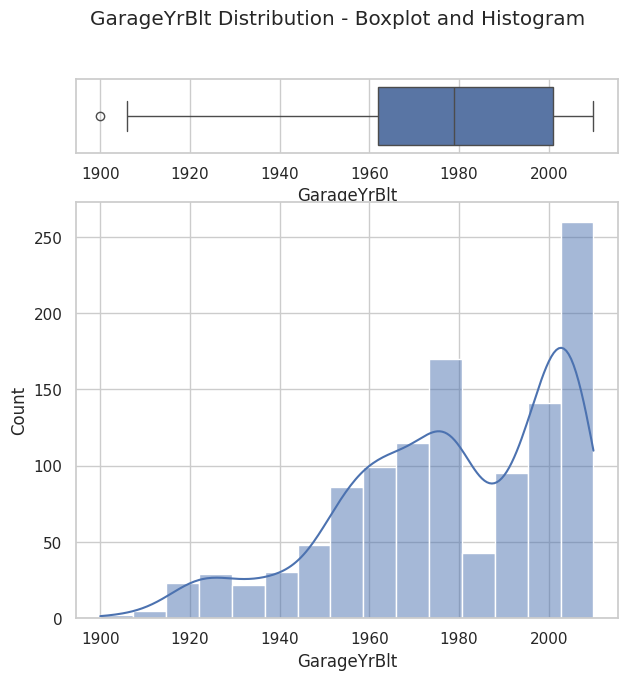

This is the range where a datapoint is not an outlier: from 1903.5 to 2059.5




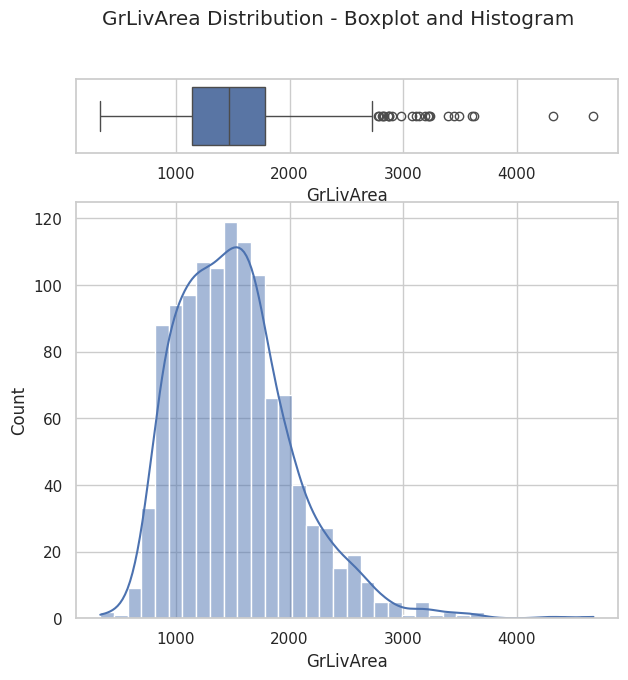

This is the range where a datapoint is not an outlier: from 164.75 to 2762.75




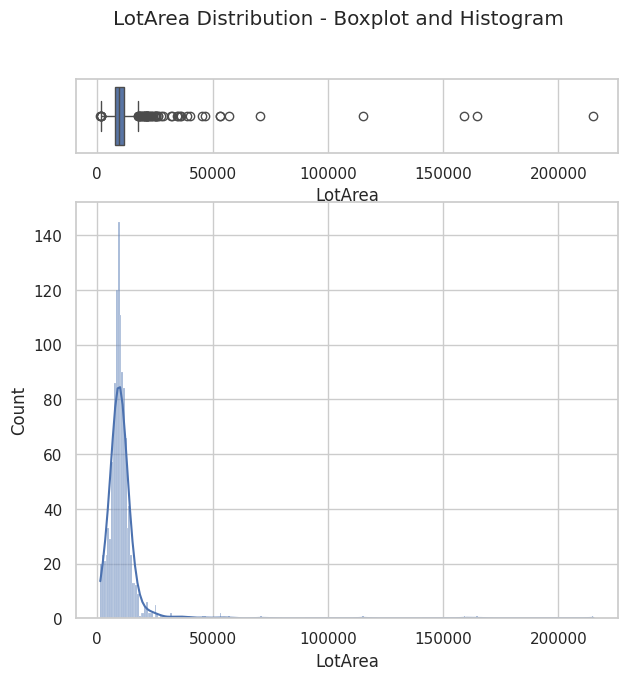

This is the range where a datapoint is not an outlier: from 1571.5 to 17619.5




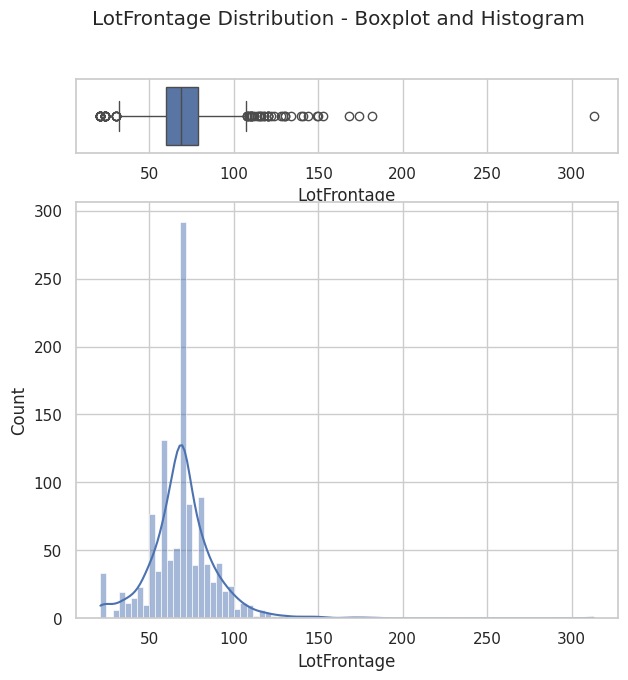

This is the range where a datapoint is not an outlier: from 31.5 to 107.5




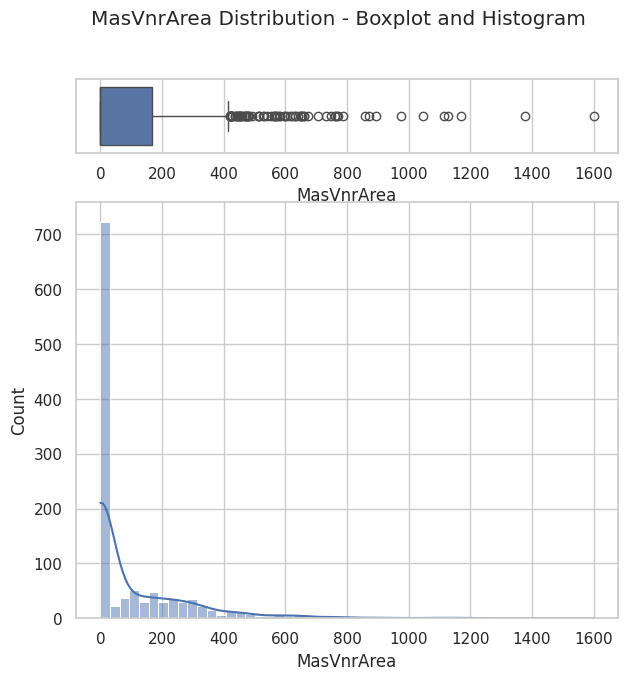

This is the range where a datapoint is not an outlier: from -249.38 to 415.62




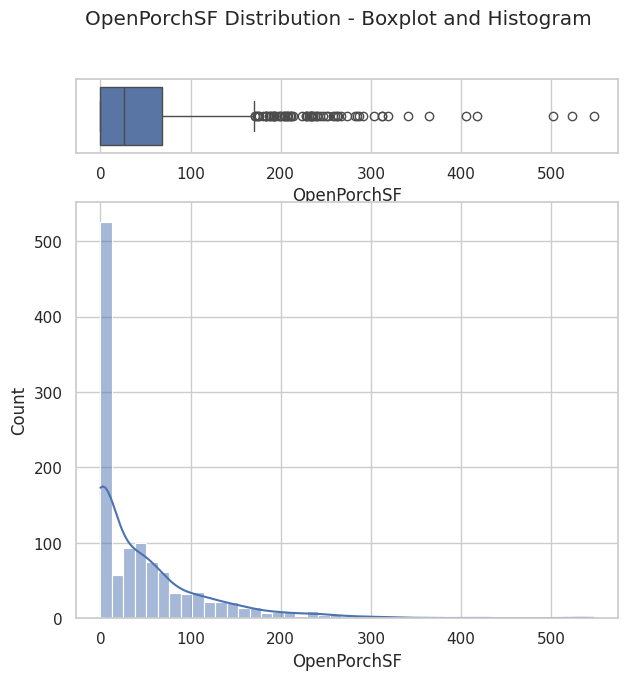

This is the range where a datapoint is not an outlier: from -102.0 to 170.0




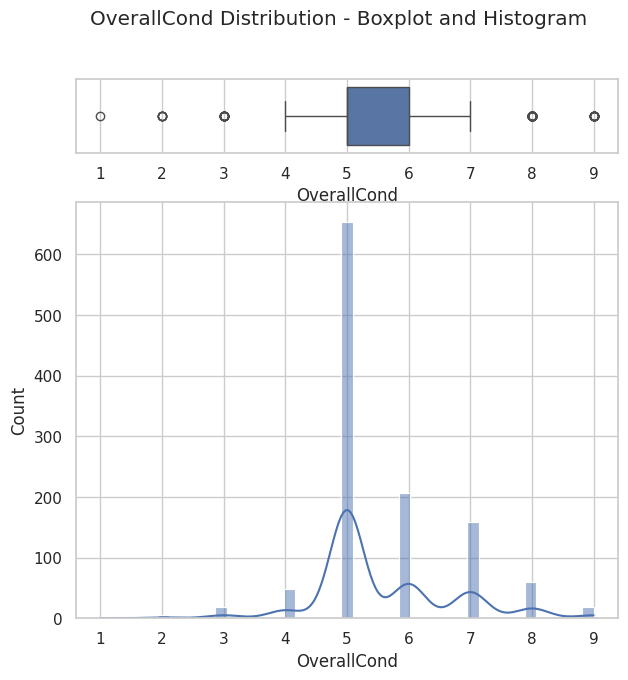

This is the range where a datapoint is not an outlier: from 3.5 to 7.5




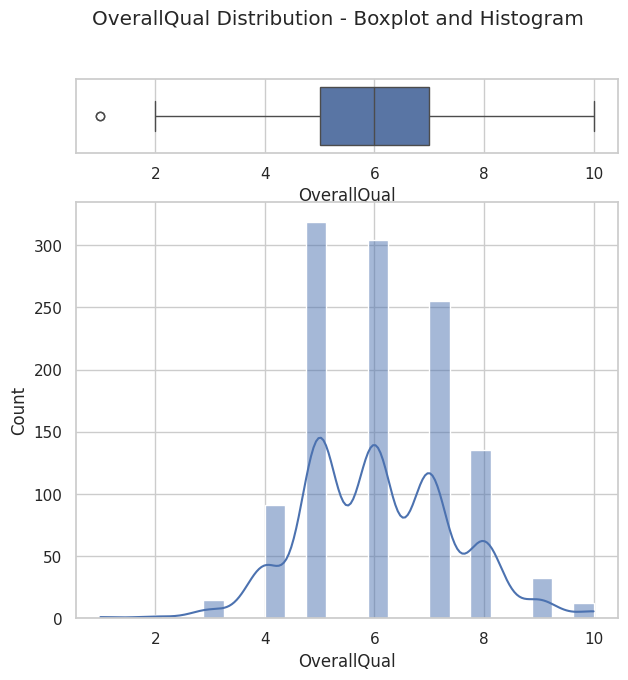

This is the range where a datapoint is not an outlier: from 2.0 to 10.0




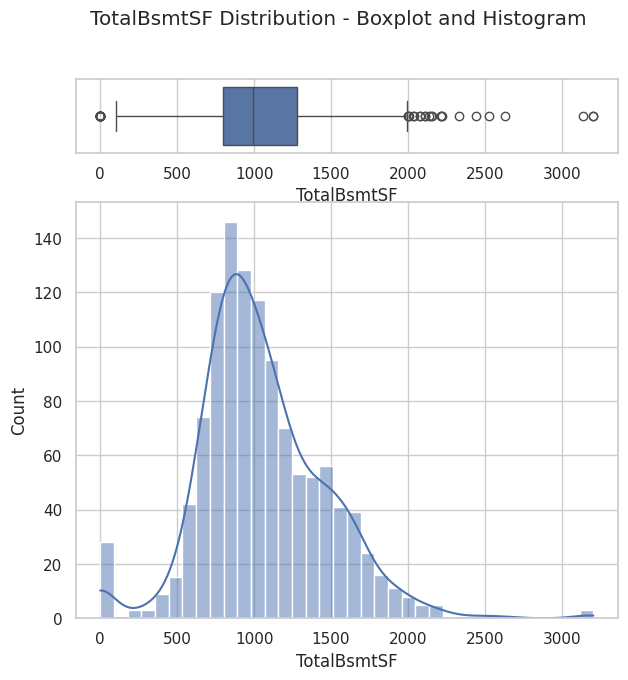

This is the range where a datapoint is not an outlier: from 82.5 to 1992.5




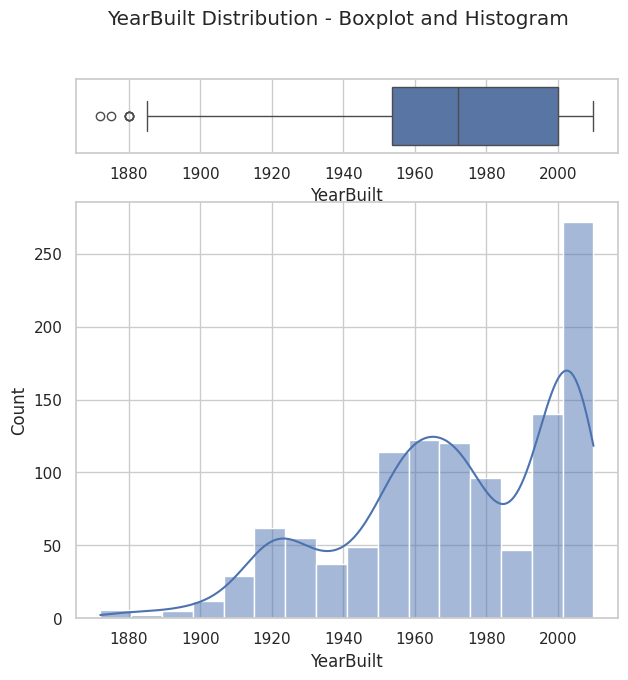

This is the range where a datapoint is not an outlier: from 1884.38 to 2069.38




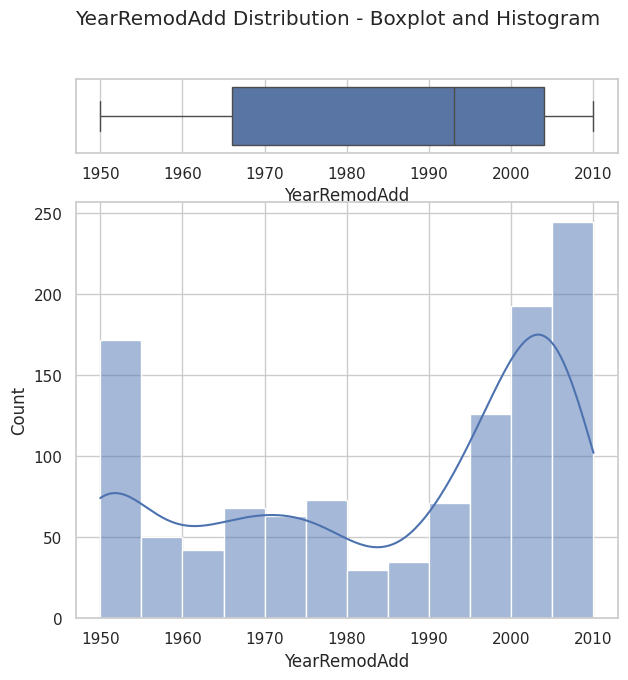

This is the range where a datapoint is not an outlier: from 1909.0 to 2061.0




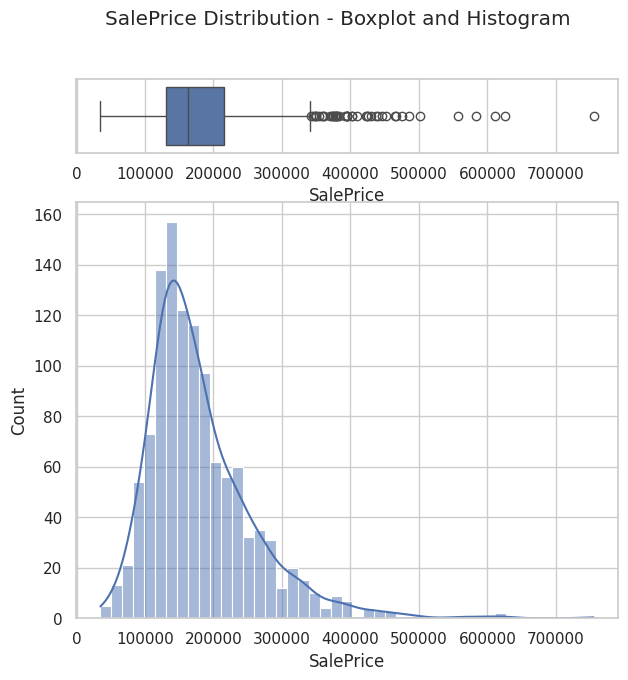

This is the range where a datapoint is not an outlier: from 2500.0 to 342500.0




In [17]:
plot_histogram_and_boxplot(TrainSet_cleaned[numerical_vars])

# Correlation and PPS Analysis of the Cleaned Data

* Use and load the custom functions provided by Code Institute to further understand the correlations and predictive power of the variables

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()
        plt.close()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()
        plt.close()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman", numeric_only=True)
    df_corr_pearson = df.corr(method="pearson", numeric_only=True)

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

* Calculate Correlations and Power Predictive Score of the dataset 
  
  * Note, this analysis is a quick check of the correlations and PPS analysis
    without handing missing values yet

In [10]:
import warnings
warnings.filterwarnings(
    "ignore",
    category=FutureWarning,
    module='ppscore'
)

df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(TrainSet_cleaned)


PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  462.0  0.058  0.105  0.0  0.0  0.0  0.074  0.618


* Based on the descriptive statistics of ppscore the heatmap treshold chosen is 0.05 and 0.1



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



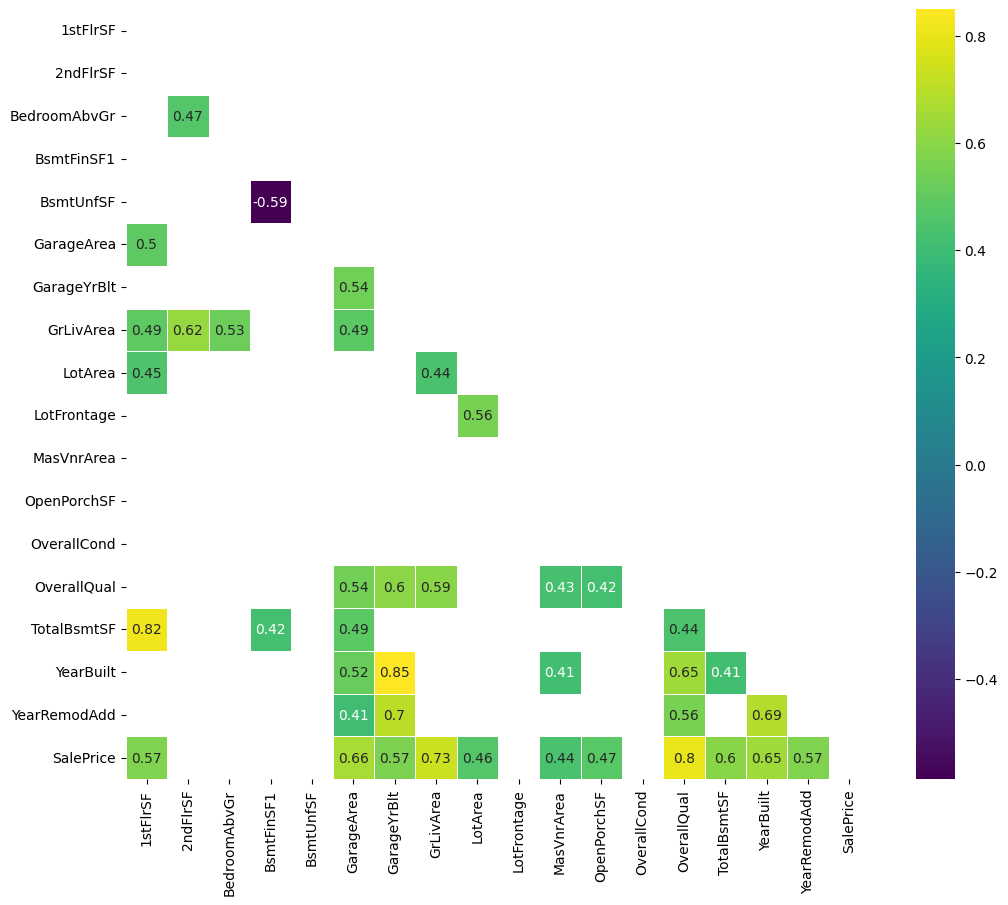



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



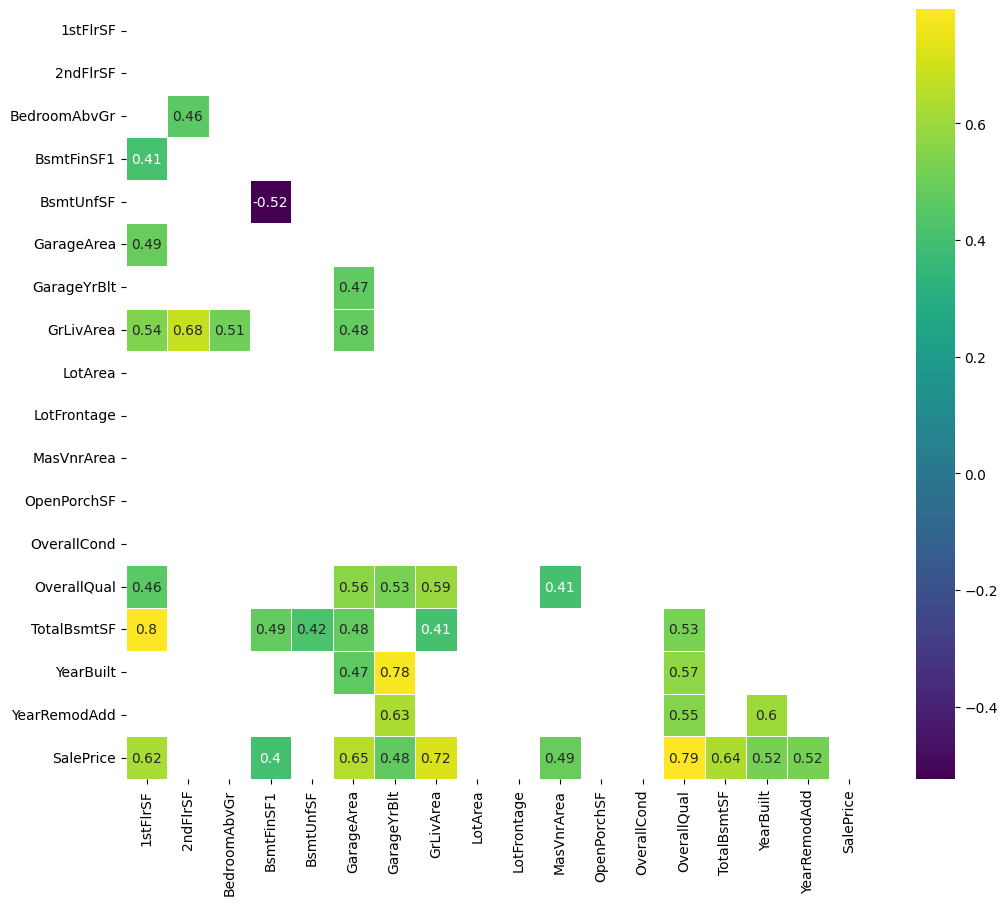



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



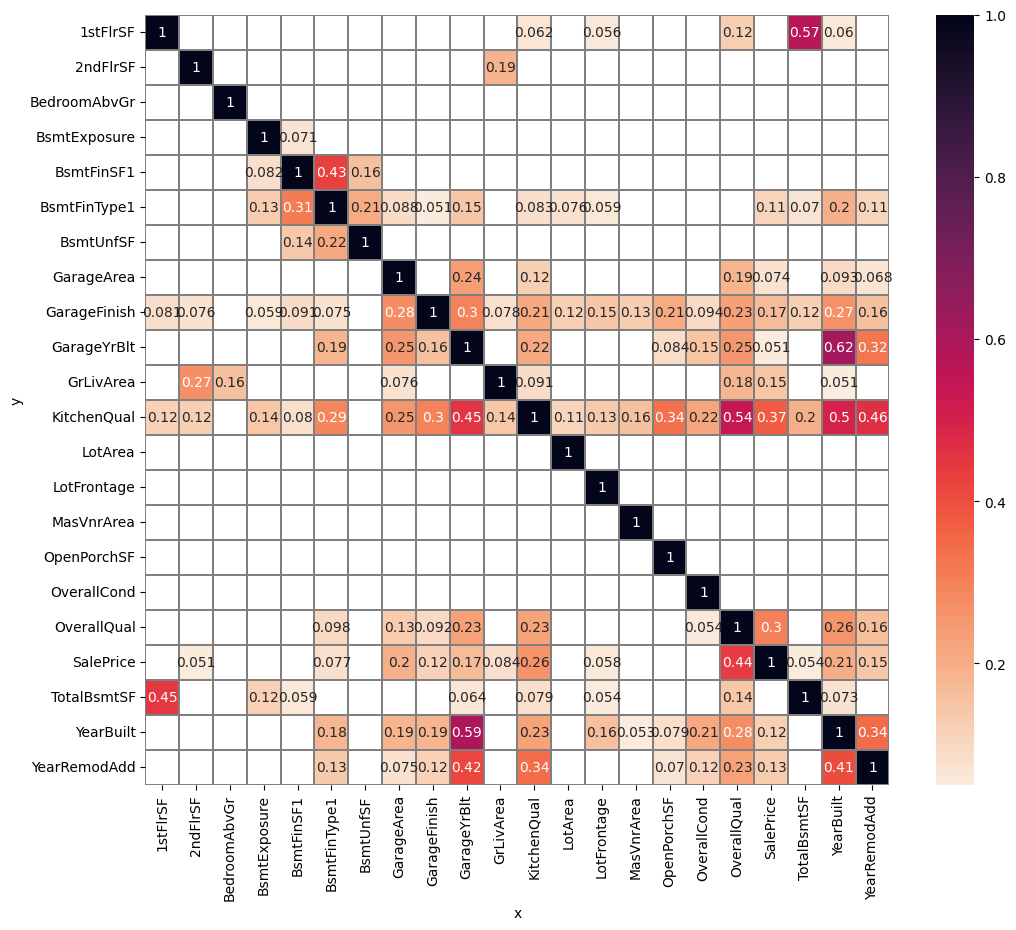

In [11]:
%matplotlib inline
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.05,
                  figsize=(12,10), font_annot=10)


## Observations

* The numerical variables carry outliers.
* Regarding Pearson/Spearman correlation and PPS analysis:
  * There are no major changes compared to the data cleaning notebook.
  * Thus, correlation levels and PPS remain pretty much the same. 

---

# Feature Engineering

#### Load and Use the custom function FeatureEngineeringAnalysis, provided by Code Institute that evaluates various feature engineering transformations

In [13]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder
sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked

#### Feature Engineering Spreadsheet Summary

* The transformers to use are:
  * Categorical Encoding
  * Numerical Transformation
  * Smart Correlation Selection

* Step 1: List the variables with more than 80 % missing values, to drop them

In [ ]:
variables_to_drop = ['EnclosedPorch', 'WoodDeckSF']

print(f"* {len(variables_to_drop)} variables to drop \n\n"
    f"{variables_to_drop}")


* Step 2: Create a separate DataFrame applying this imputation approach to the selected variables.

In [ ]:
from feature_engine.selection import DropFeatures
feature_dropper  = DropFeatures(features_to_drop = variables_to_drop)
feature_dropper.fit(TrainSet)
TrainSet_feat_dropped  = feature_dropper.transform(TrainSet)

  * In this case, there is no effect on the distribution of the variable, since we removed entire columns.

* Step 3: Apply the transformation to the data

In [ ]:
TrainSet_feat_dropped, TestSet_feat_dropped  = feature_dropper.transform(TrainSet) , feature_dropper.transform(TestSet)

#### Second Imputation approach: Perform Categorical Imputation

* Step 1: List the categorical variables (their missing values will be replaced with the word "Missing")

In [ ]:
categorical_vars = TrainSet_feat_dropped.select_dtypes(include='object').columns.to_list()
categorical_vars

* Step 2: Create a separate DataFrame applying this imputation approach to the selected variables.

In [ ]:
from feature_engine.imputation import CategoricalImputer
categorical_imputer= CategoricalImputer(imputation_method='missing',
                                                  fill_value='Missing',
                                                  variables=categorical_vars)
categorical_imputer.fit(TrainSet_feat_dropped)
TrainSet_categ_imputed  = categorical_imputer.transform(TrainSet_feat_dropped)

* Step 3: Confirm that the categorical variables do not have misssing values 

In [ ]:
EvaluateMissingData(TrainSet_categ_imputed)

* Step 4: Apply the transformation to the data

In [ ]:
TrainSet_categ_imputed, TestSet_categ_imputed  = categorical_imputer.transform(TrainSet_feat_dropped), categorical_imputer.transform(TestSet_feat_dropped)

#### Third Imputation approach: Perform Mediam Imputation to Numerical variables

* Step 1: List the numerical variables (their missing values will be replaced with the median value of the variable)
  
    * Note, notebook "2-House Sales Price Study.ipynb" described that the numerical variables in this dataset are not normally distributed

In [ ]:
numerical_vars = TrainSet_categ_imputed.select_dtypes(include="number").columns.to_list()
print(numerical_vars)
print(len(numerical_vars))

* Step 2: Create a separate DataFrame applying this imputation approach to the selected variables.

In [ ]:
from feature_engine.imputation import MeanMedianImputer
numerical_imputer = MeanMedianImputer(imputation_method='median',
                            variables= numerical_vars)

numerical_imputer.fit(TrainSet_categ_imputed)
TrainSet_cat_num_imputed  = numerical_imputer.transform(TrainSet_categ_imputed)

* Step 3: Confirm that the numerical variables also do not have misssing values

In [ ]:
EvaluateMissingData(TrainSet_cat_num_imputed)


* Step 4: Apply the transformation to the data

In [ ]:
TrainSet_cat_num_imputed, TestSet_cat_num_imputed  = numerical_imputer.transform(TrainSet_categ_imputed), numerical_imputer.transform(TestSet_categ_imputed)

* Step 5: Confirm that the TestSet has also no missing values

In [ ]:
EvaluateMissingData(TestSet_cat_num_imputed)

#### Assess the effect on the variable distribution

* Step 1: List all the imputed variables
  
  * It is going to be 22 because 2 were dropped.

In [ ]:
all_imputed_variables = categorical_vars + numerical_vars
print(all_imputed_variables)
print(len(all_imputed_variables))

* Step 2: Load custom function from Code Institute (with a small modification)

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

def DataCleaningEffect(df_original, df_cleaned, variables_applied_with_method):

    flag_count = 1 # Indicate plot number

    # Distinguish between numerical and categorical variables based on the original DataFrame
    categorical_variables = df_original.select_dtypes(exclude=['number']).columns

    print("\n=====================================================================================")
    print(f"* Distribution Effect Analysis After Data Cleaning Method in the following variables:")
    print(f"{variables_applied_with_method} \n\n")

    # Directly iterate over the list of variables
    for var in variables_applied_with_method:
        if var in categorical_variables:  # it is categorical variable: barplot

            df1 = pd.DataFrame({"Type": "Original", "Value": df_original[var]})
            df2 = pd.DataFrame({"Type": "Cleaned", "Value": df_cleaned[var]})
            dfAux = pd.concat([df1, df2], axis=0)

            dfAux = dfAux.reset_index(drop=True)

            fig, axes = plt.subplots(figsize=(15, 5))
            sns.countplot(hue='Type', data=dfAux, x="Value", palette=['#432371', "#FAAE7B"])
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.xticks(rotation=90)
            plt.legend()

        else: # it is numerical variable: histogram

            fig, axes = plt.subplots(figsize=(10, 5))
            # Use 'ax=axes' to plot on the created subplot
            sns.histplot(data=df_original, x=var, color="#432371", label='Original', kde=True, element="step", ax=axes)
            sns.histplot(data=df_cleaned, x=var, color="#FAAE7B", label='Cleaned', kde=True, element="step", ax=axes)
            axes.set(title=f"Distribution Plot {flag_count}: {var}")
            plt.legend()

        plt.show()
        flag_count += 1


In [ ]:
DataCleaningEffect(df_original=TrainSet, df_cleaned=TrainSet_cat_num_imputed,
                   variables_applied_with_method= all_imputed_variables)


---

# Push cleaned data to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/cleaned') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

#### Save Train Set

In [ ]:
TrainSet_cat_num_imputed.to_csv("outputs/datasets/cleaned/TrainSetCleaned.csv", index=False)

#### Save Test Set

In [ ]:
TestSet_cat_num_imputed.to_csv("outputs/datasets/cleaned/TestSetCleaned.csv", index=False)

<br>

# Conclusions

The correlations and plots interpretation converge.

* Data Cleaning pipeline.
* Drop variables: [EnclosedPorch', 'WoodDeckSF']
* Handle missing values with feature engine imputation for both, categorical and numerical variables. 